In [56]:
import pandas as pd
import numpy as np
XXX = pd.read_csv("tmp_hms_sav_ass.csv", sep=';')
XXX

,id,idResource,idProject,refType,refId,rate,assignedWork,realWork,leftWork,plannedWork,...,plannedEndDate,idRole,dailyCost,newDailyCost,assignedCost,realCost,leftCost,plannedCost,billedWork,notPlannedWork
0,1,5,1,Activity,1,100,NaN,21.00,0.0,21.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
1,4,15,4,Activity,4,100,NaN,131.00,0.0,131.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
2,6,15,4,Activity,6,100,NaN,21.00,0.0,21.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
3,8,15,4,Activity,9,100,NaN,4.00,0.0,4.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
4,9,15,4,Activity,10,100,NaN,2.00,0.0,2.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,7601,9,34,Activity,594,100,NaN,0.00,0.0,0.00,...,NaN,4.0,873.0,873.0,0.0,0.00,0.0,0.00,0.0,0.0
7197,7602,32,34,Activity,594,100,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7198,7603,9,34,Activity,597,100,NaN,0.25,0.0,0.25,...,NaN,4.0,873.0,873.0,0.0,218.25,0.0,218.25,0.0,0.0
7199,7604,7,12,Activity,1524,100,NaN,0.50,0.0,0.50,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0


In [101]:
XX =  XXX[['idResource','idProject','refId','realCost','realWork']]
dataset = XX.replace(np.nan,0)
dataset = XX.replace(np.nan,0)
dataset['realWork'] =  dataset['realWork'].astype(int)
dataset['realCost'] =  dataset['realCost'].astype(int)
dataset

,idResource,idProject,refId,realCost,realWork
0,5,1,1,0,21
1,15,4,4,0,131
2,15,4,6,0,21
3,15,4,9,0,4
4,15,4,10,0,2
...,...,...,...,...,...
7196,9,34,594,0,0
7197,32,34,594,0,0
7198,9,34,597,218,0
7199,7,12,1524,0,0


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [107]:
y_pred = classifier.predict(X_test)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[1308   15    6 ...    0    0    0]
 [   9    8    1 ...    0    0    0]
 [   6    4    1 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1351
           1       0.24      0.38      0.29        21
           2       0.08      0.08      0.08        13
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13   

C:\Users\saifn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saifn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
      

Text(0, 0.5, 'Mean Error')

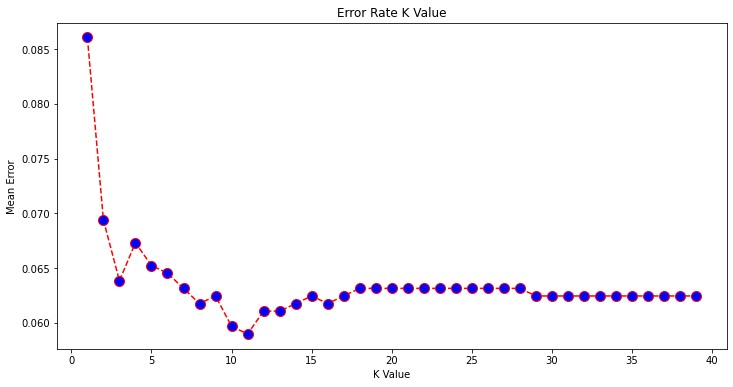

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [111]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,40)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
#Compute accuracy on the training set
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    
    test_accuracy[i] = knn.score(X_test, y_test) 

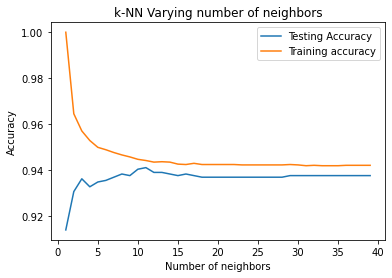

In [112]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
  

In [113]:
knn.score(X_test, y_test)

0.9375433726578765